En este experimento vamos a comprobar el rendimiento del Algoritmo de Frank Wolfe con Varianza Reducida Privado

Llamamos las librerias necesarias para el proyecto

In [9]:
from numpy import zeros
from SetsManager import get_l1_ball, generate_data
from Loss import LossFunction
from PrivateVarianceReduced import PVarReducedFW
from numpy.random import rand
from matplotlib.pyplot import hist, title, xlabel, ylabel, xticks, show

Seteamos los parámetros comunes del experimento

In [10]:
dim = 10
radio = 1
radio_data = 20
epsilon = 2
tamano_data = 50000
tamano_test = 50000
num_iter = 200
f = LossFunction()
f.L0 = 8*radio
f.L1 = 2
errores = []

Definimos las iteraciones y guardamos el error obtenido

In [11]:
for t in range(num_iter):
    x_star = 1/dim*(2*radio*rand(dim) - radio)
    Y, Z = generate_data(x_star, tamano_data, radio_data, 0.05)
    vertices = get_l1_ball(dim, radio)
    x_zero = zeros(dim)
    model = PVarReducedFW(Z, Y, epsilon, vertices, f, 2*radio, x_zero, 10)
    model.run()
    Y_test, Z_test = generate_data(x_star, tamano_test, radio_data, 0.05)
    errores.append(f.set_f(model.x_final, Y_test, Z_test))

Graficámos los resultados del experimento

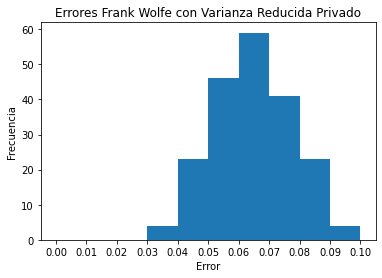

In [13]:
intervalos = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
hist(x = errores, bins = intervalos)
title("Errores Frank Wolfe con Varianza Reducida Privado")
xlabel("Error")
ylabel("Frecuencia")
xticks(intervalos)
show()